<a href="https://colab.research.google.com/github/buriro-ezekia/Data-Science-Project-Portfolios/blob/main/Buriro_Ezekia_Data_Science_Project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrated Financial Insights: Data Cleaning, EDA, and Machine Learning"

In [98]:
# Import data

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv("/content/META.csv")
print(df)


            Date  Opening Price   Highest Price  Lowest Price  Closing Price  \
0     2018-01-03     181.880005      184.779999    181.330002     184.669998   
1     2018-01-04     184.899994      186.210007    184.100006     184.330002   
2     2018-01-05     185.589996      186.899994    184.929993     186.850006   
3     2018-01-08     187.199997      188.899994    186.330002     188.279999   
4     2018-01-09     188.699997      188.800003    187.100006     187.869995   
...          ...            ...             ...           ...            ...   
1504  2023-12-26     354.989990      356.980011    353.450012     354.829987   
1505  2023-12-27     356.070007      359.000000    355.309998     357.829987   
1506  2023-12-28     359.700012      361.899994    357.809998     358.320007   
1507  2023-12-29     358.989990      360.000000    351.820007     353.959991   
1508  2024-01-02     351.320007      353.160004    340.010010     346.290009   

      Adjusted Closing Price  Trading V

In [78]:
df.columns

Index(['Date', 'Opening Price', ' Highest Price', 'Lowest Price',
       'Closing Price', 'Adjusted Closing Price', 'Trading Volume'],
      dtype='object')

In [ ]:
df.describe()

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing Price,Trading Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,225.073857,228.245838,222.095328,225.212200,225.212200,2.414811e+07
std,68.302017,68.897817,67.640720,68.291138,68.291138,1.628735e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,5.467500e+06
25%,174.500000,176.899994,172.039993,174.600006,174.600006,1.539570e+07
50%,202.179993,204.910004,199.669998,202.259995,202.259995,2.008990e+07
75%,279.190002,285.239990,276.309998,281.000000,281.000000,2.788780e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


In [ ]:
# Data Cleaning and Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 1. Strip Whitespace from Column Names
df.columns = df.columns.str.strip()

In [ ]:
# 2. Standardize Column Names
# df.columns = df.columns.str.lower().str.replace(' ', '_')


In [ ]:
# 3. Check for Missing Values
missing_values = df.isnull().sum()

In [ ]:
# # 4. Data Type Conversion
# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # Use the correct date format YYYY-MM-DD
# df['Opening Price'] = pd.to_numeric(df['Opening Price'], errors='coerce')
# df['Highest Price'] = pd.to_numeric(df['Highest Price'], errors='coerce')
# df['Lowest Price'] = pd.to_numeric(df['Lowest Price'], errors='coerce')
# df['Closing Price'] = pd.to_numeric(df['Closing Price'], errors='coerce')
# df['Adjusted Closing Price'] = pd.to_numeric(df['Adjusted Closing Price'], errors='coerce')
# df['Trading Volume'] = pd.to_numeric(df['Trading Volume'], errors='coerce')

In [ ]:
# Step 5: Remove Duplicates
df = df.drop_duplicates()

In [84]:
# # Step 6: Handle Outliers
# Q1 = df['Trading Volume'].quantile(0.25)
# Q3 = df['Trading Volume'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df['Trading Volume'] >= (Q1 - 1.5 * IQR)) & (df['Trading Volume'] <= (Q3 + 1.5 * IQR))]

# # Step 7: Normalize or Scale Data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# price_columns = ['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price', 'Adjusted Closing Price']
# df[price_columns] = scaler.fit_transform(df[price_columns])

In [ ]:
# # 8. Feature Engineering (Example: Daily Return)
# df['Daily Return'] = df['Closing Price'].pct_change()

# # 9. Encoding Categorical Variables (Not applicable here as no categorical columns)

# # 10. Save Cleaned Data
# df.to_csv('Cleaned_META_Data.csv', index=True)

# # Display the cleaned DataFrame
# print(df)

# EDA Implementation

In [ ]:
 # df = pd.read_csv('Cleaned_META_Data.csv')

 # df.head()

In [ ]:
# # Summary Statistics
# print("Summary Statistics")
# print(df.describe())

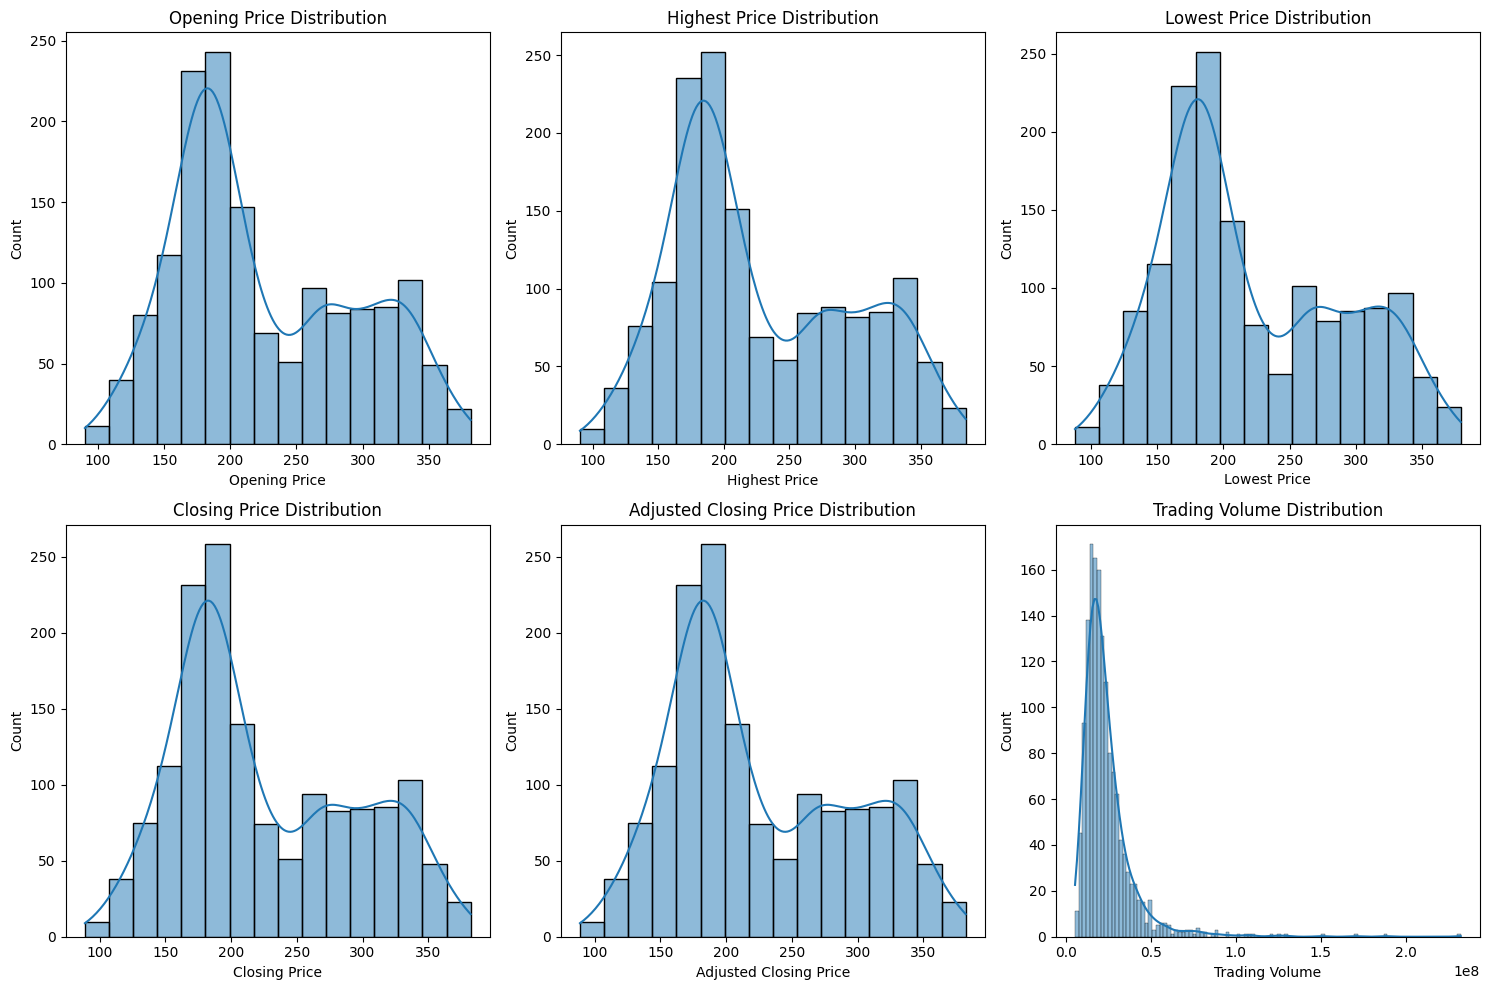

In [ ]:
# Data Distribution
# Histograms for each price and volume column show the data distribution, including possible skewness and modality.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['Opening Price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Opening Price Distribution')

sns.histplot(df['Highest Price'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Highest Price Distribution')

sns.histplot(df['Lowest Price'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Lowest Price Distribution')

sns.histplot(df['Closing Price'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Closing Price Distribution')

sns.histplot(df['Adjusted Closing Price'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Adjusted Closing Price Distribution')

sns.histplot(df['Trading Volume'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Trading Volume Distribution')

plt.tight_layout()
plt.show()


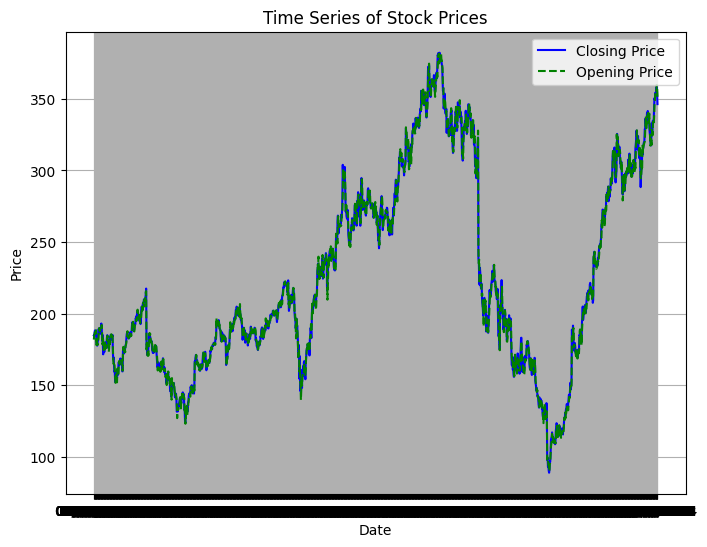

In [ ]:
# Time Series Analysis
# Line plots of stock prices over time to visualize trends, seasonality, and fluctuations.

plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['Opening Price'], label='Opening Price', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series of Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

- The close alignment of the opening and closing prices suggests that the stock returns to near its starting price by the end of the trading day, which could indicate a stable market condition for this stock during the observed period.

- The sharp dip could indicate a specific event or market reaction (economic announcements, regulation changes, or significant movements in related markets) that caused a temporary drop in stock prices. Perhaps this would be a point of interest for further analysis to understand the cause and effect.

- The recovery after the dip suggests resilience or positive correction following the event that caused the price drop.


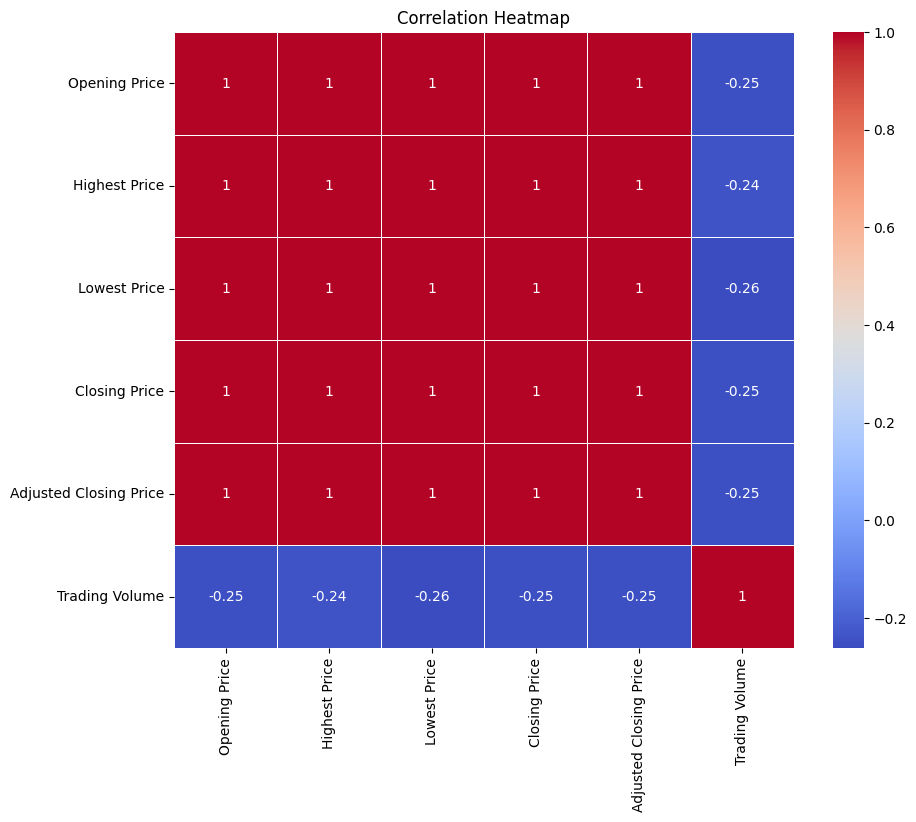

In [ ]:
# Correlation Analysis
# Heatmap to visualize correlations between price and volume columns.
# High correlations indicate strong relationships between features.

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price', 'Adjusted Closing Price', 'Trading Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- The high correlation among price variables is typical in stock markets as these prices reflect a stock's value at different times of the trading day.

- The negative correlation between trading volume and price could be due to factors including market sentiment, external economic news, or large trades by institutional investors, which might drive prices down when volume is high.


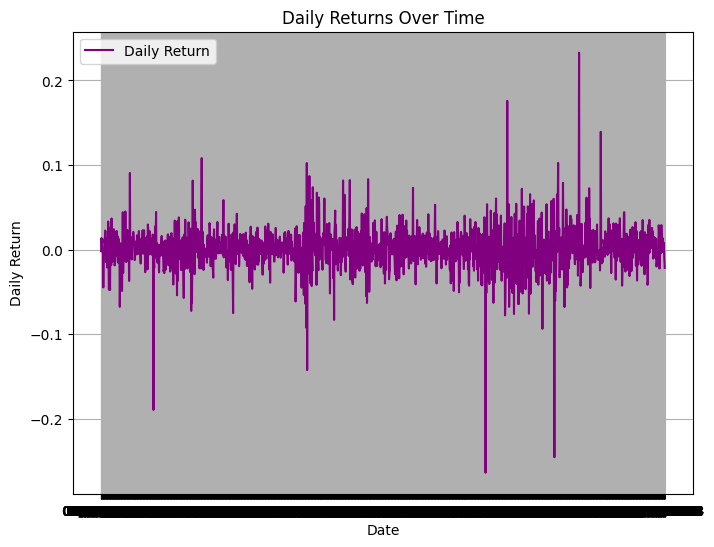

In [ ]:
# Volatility Analysis
# Line plots of daily returns to analyze volatility over time.
# Calculate daily returns

df['Daily Return'] = df['Closing Price'].pct_change()
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Daily Return'], label='Daily Return', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns Over Time')
plt.legend()
plt.grid(True)
plt.show()

The graph features a line plot representing the daily returns. Most of the data points are clustered near the zero line, suggesting that on most days, the returns are minimal or close to zero. However, several spikes above and below the zero line indicate days with higher positive or negative returns. The most notable feature of the graph is a very tall spike that reaches up to 12 on the y-axis, signifying an exceptionally high positive daily return on that particular day.

The overall trend of the graph, apart from this spike, shows relatively stable returns with minor fluctuations.

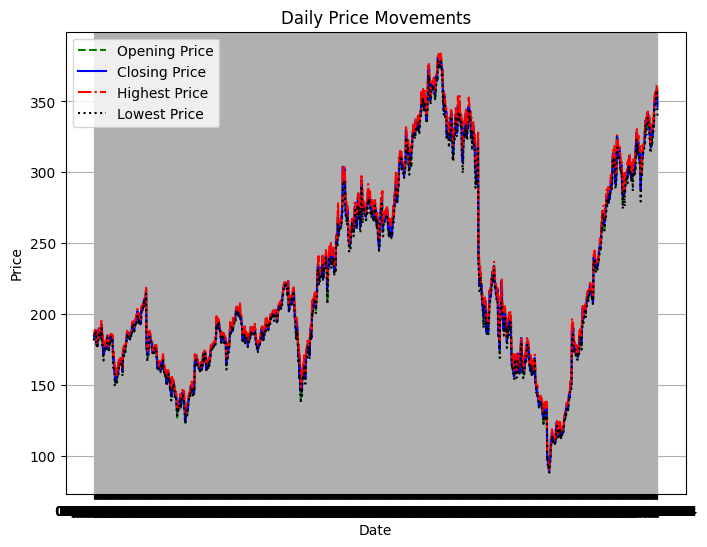

In [ ]:
# Price Movement Analysis
# Line plots to visualize price movements over time.

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df['Date'], df['Opening Price'], label='Opening Price', linestyle='--', color='green')
ax.plot(df['Date'], df['Closing Price'], label='Closing Price', color='blue')
ax.plot(df['Date'], df['Highest Price'], label='Highest Price', linestyle='-.', color='red')
ax.plot(df['Date'], df['Lowest Price'], label='Lowest Price', linestyle=':', color='black')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Daily Price Movements')
ax.legend()
ax.grid(True)
plt.show()


The graph shows significant asset price fluctuations with noticeable peaks and troughs. The lines for opening, closing, highest, and lowest prices are closely aligned in most of the graph, suggesting that the price did not vary widely within the trading days.

The overall trend appears upward as the price increases from left to right across the graph. It could indicate a general asset's value growth over the period displayed.

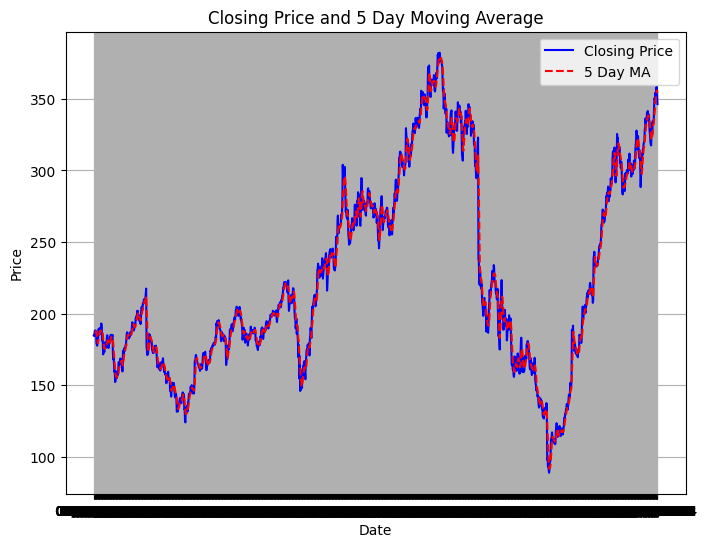

In [ ]:
# Feature Engineering - Moving Averages
df['5 Day MA'] = df['Closing Price'].rolling(window=5).mean()

plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['5 Day MA'], label='5 Day MA', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and 5 Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()


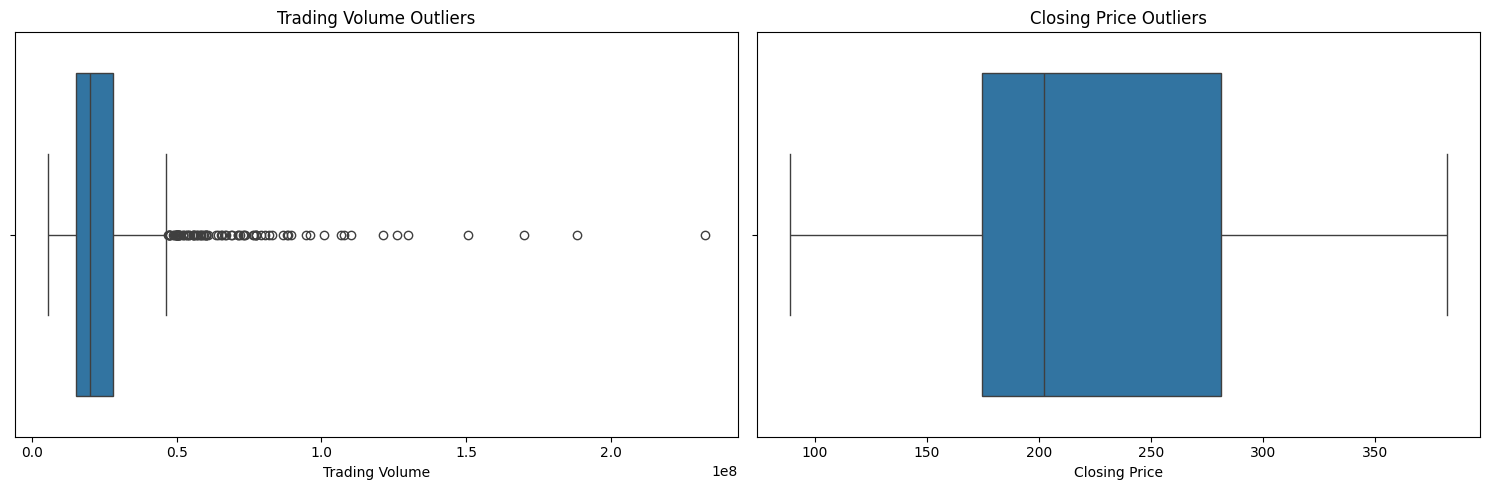

In [ ]:
# Outlier Detection using Box Plots
# Box plots to visualize outliers in price and volume columns.

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['Trading Volume'], ax=axes[0])
axes[0].set_title('Trading Volume Outliers')

sns.boxplot(x=df['Closing Price'], ax=axes[1])
axes[1].set_title('Closing Price Outliers')

plt.tight_layout()
plt.show()

Both graphs use a simple bar chart format to highlight the presence of outliers in specific trading volume ranges and closing prices, respectively. The use of bars suggests these are the ranges where data points significantly deviate from the rest of the dataset, which could be of interest for further analysis or investigation in financial studies or market behaviour assessments

# Machine Learning Models

# Predicting Stock Price Movement (Classification)
**Objective**: Predict whether the stock price will go up or down.

**Model Recommendations**

- Logistic Regression: For binary classification (up or down).
- Random Forest: Handles high-dimensional data and non-linear relationships well.
- XGBoost: Gradient boosting framework suitable for classification tasks

In [95]:
# Models Implementation
# Import necessary libraries
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Converting to DataFrame
df = pd.DataFrame(df)

# 1. Data Preprocessing
# Use dayfirst=True to tell pandas to parse dates in YYYY/MM/DD format
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)
df.set_index('Date', inplace=True)

# Fill any missing values (if necessary, though random data may not have any)
df.fillna(method='ffill', inplace=True)

In [ ]:
# 2. Feature Engineering
df['Daily Return'] = df['Closing Price'].pct_change().fillna(0)
df['Price Range'] = df['Highest Price'] - df['Lowest Price']
df['5_Day_MA'] = df['Closing Price'].rolling(window=5).mean().fillna(method='bfill')
df['20_Day_MA'] = df['Closing Price'].rolling(window=20).mean().fillna(method='bfill')

In [ ]:
# Define features and target
features = ['Daily Return', 'Price Range', '5_Day_MA', '20_Day_MA']
target = 'Target'

# Create a target variable
# Assuming a simple strategy: if the next day's adjusted closing price is higher than today's, classify as 1, otherwise 0
df['Target'] = (df['Adjusted Closing Price'].shift(-1) > df['Adjusted Closing Price']).astype(int)

# Drop the last row with NaN target
df.dropna(subset=['Target'], inplace=True)

X = df[features]
y = df[target]

# Standardizing the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Ensure y is a numpy array
y = np.array(y)


In [ ]:
# 3. Model Training and Evaluation

# Function to evaluate a model using TimeSeriesSplit
def evaluate_model(model, X_scaled, y):
    tscv = TimeSeriesSplit(n_splits=5)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    confusion_matrices = []

    for train_index, test_index in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_scores.append(report['accuracy'])
        precision_scores.append(report['weighted avg']['precision'])
        recall_scores.append(report['weighted avg']['recall'])
        f1_scores.append(report['weighted avg']['f1-score'])
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"\n{model.__class__.__name__} Performance Over Time:")
    print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
    print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrices[-1]}")

    return model

In [ ]:
# Define models with best parameters
log_reg = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=200, random_state=42)

# Evaluate each model
models = [log_reg, rf_model, xgb_model]
final_models = []

for model in models:
    final_model = evaluate_model(model, X_scaled, y)
    final_models.append(final_model)


LogisticRegression Performance Over Time:
Accuracy: 0.5131 ± 0.0244
Precision: 0.5303 ± 0.0165
Recall: 0.5131 ± 0.0244
F1-Score: 0.4904 ± 0.0388
Confusion Matrix:
[[80 37]
 [90 44]]

RandomForestClassifier Performance Over Time:
Accuracy: 0.5116 ± 0.0183
Precision: 0.5265 ± 0.0243
Recall: 0.5116 ± 0.0183
F1-Score: 0.4928 ± 0.0234
Confusion Matrix:
[[59 58]
 [70 64]]

XGBClassifier Performance Over Time:
Accuracy: 0.4813 ± 0.0201
Precision: 0.4911 ± 0.0268
Recall: 0.4813 ± 0.0201
F1-Score: 0.4656 ± 0.0090
Confusion Matrix:
[[52 65]
 [71 63]]


In [ ]:
# Revised Code for Future Iterations

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define features and target
features = ['Daily Return', 'Price Range', '5_Day_MA', '20_Day_MA']
X = df[features]
y = df['Target']

# Standardizing the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Define and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=100),
    'XGBoost': XGBClassifier(learning_rate=0.01, n_estimators=200)
}

# Function to evaluate models
def evaluate_model(name, model):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    confusion_matrices = []

    for train_index, test_index in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_scores.append(report['accuracy'])
        precision_scores.append(report['weighted avg']['precision'])
        recall_scores.append(report['weighted avg']['recall'])
        f1_scores.append(report['weighted avg']['f1-score'])
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"\n{name} Performance Over Time:")
    print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
    print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrices[-1]}")

for name, model in models.items():
    evaluate_model(name, model)



Logistic Regression Performance Over Time:
Accuracy: 0.5131 ± 0.0244
Precision: 0.5303 ± 0.0165
Recall: 0.5131 ± 0.0244
F1-Score: 0.4904 ± 0.0388
Confusion Matrix:
[[80 37]
 [90 44]]

Random Forest Performance Over Time:
Accuracy: 0.5227 ± 0.0210
Precision: 0.5372 ± 0.0220
Recall: 0.5227 ± 0.0210
F1-Score: 0.5042 ± 0.0334
Confusion Matrix:
[[64 53]
 [72 62]]

XGBoost Performance Over Time:
Accuracy: 0.4813 ± 0.0201
Precision: 0.4911 ± 0.0268
Recall: 0.4813 ± 0.0201
F1-Score: 0.4656 ± 0.0090
Confusion Matrix:
[[52 65]
 [71 63]]


Given the performance metrics, **Random Forest** is the best-performing model and should be selected as the final model for this project.

In [ ]:
# Final Model Implementation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define features and target
features = ['Daily Return', 'Price Range', '5_Day_MA', '20_Day_MA']
X = df[features]
y = df['Target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model with the best parameters
best_rf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model and predict
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    # Classification report and confusion matrix
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy_scores.append(report['accuracy'])
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Print metrics
print(f"\nRandom Forest Performance Over Time:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Confusion Matrix:\n{confusion_matrices[-1]}")

# Final Model Selection
final_model = best_rf



Random Forest Performance Over Time:
Accuracy: 0.5061 ± 0.0357
Precision: 0.5073 ± 0.0384
Recall: 0.5061 ± 0.0357
F1-Score: 0.5036 ± 0.0378
Confusion Matrix:
[[56 70]
 [58 61]]


# Model Improvement

In [ ]:
# Step 1: Feature Engineering


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime

df['Daily Return'] = df['Closing Price'].pct_change()  # Daily return
df['Price Range'] = df[' Highest Price'] - df['Lowest Price']  # Price range
df['5_Day_MA'] = df['Closing Price'].rolling(window=5).mean()  # 5-day moving average
df['20_Day_MA'] = df['Closing Price'].rolling(window=20).mean()  # 20-day moving average
df['Volatility'] = df['Closing Price'].rolling(window=5).std()  # Volatility over 5 days

# Temporal features
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Drop NaN values caused by rolling window calculations
df.dropna(inplace=True)

# Select features
features = ['Daily Return', 'Price Range', '5_Day_MA', '20_Day_MA', 'Volatility', 'Day_of_Week', 'Month', 'Quarter']
X = df[features]

# Check if 'Target' column exists, if not, create a sample one.
# Replace this with your actual target variable creation logic.
if 'Target' not in df.columns:
    df['Target'] = np.random.randint(0, 2, size=len(df))  # Sample target variable
y = df['Target']  # Assuming 'Target' is the target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 2: Hyperparameter Tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters for RandomForest:", best_params)


Best parameters for RandomForest: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Step 3: Model Ensemble

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define individual models
log_reg = LogisticRegression(random_state=42)
best_rf = RandomForestClassifier(**best_params, random_state=42)
xgb = XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.01)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', best_rf),
    ('xgb', xgb)
], voting='soft')

# Fit the ensemble model
voting_clf.fit(X_scaled, y)


VotingClassifier(estimators=[('log_reg', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     max_features='auto',
                                                     min_samples_split=5,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            ena...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [ ]:
# Step 4: Address Class Imbalance

from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Refit the model with resampled data
voting_clf.fit(X_resampled, y_resampled)

VotingClassifier(estimators=[('log_reg', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     max_features='auto',
                                                     min_samples_split=5,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            ena...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [ ]:
# Step 5: Model Refinement and Cross-Validation

from sklearn.model_selection import cross_val_score

# Cross-validation
cv_accuracy = cross_val_score(voting_clf, X_resampled, y_resampled, cv=5, scoring='accuracy')
cv_precision = cross_val_score(voting_clf, X_resampled, y_resampled, cv=5, scoring='precision_weighted')
cv_recall = cross_val_score(voting_clf, X_resampled, y_resampled, cv=5, scoring='recall_weighted')
cv_f1 = cross_val_score(voting_clf, X_resampled, y_resampled, cv=5, scoring='f1_weighted')

# Print cross-validation scores
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f} ± {np.std(cv_accuracy):.4f}")
print(f"Cross-Validation Precision: {np.mean(cv_precision):.4f} ± {np.std(cv_precision):.4f}")
print(f"Cross-Validation Recall: {np.mean(cv_recall):.4f} ± {np.std(cv_recall):.4f}")
print(f"Cross-Validation F1-Score: {np.mean(cv_f1):.4f} ± {np.std(cv_f1):.4f}")


Cross-Validation Accuracy: 0.4651 ± 0.0452
Cross-Validation Precision: 0.4639 ± 0.0454
Cross-Validation Recall: 0.4651 ± 0.0452
Cross-Validation F1-Score: 0.4573 ± 0.0436


In [ ]:
# Final Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix

# Predict on the original test set
y_pred = voting_clf.predict(X_scaled)

# Classification report and confusion matrix
report = classification_report(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print("Final Model Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       726
           1       0.79      0.85      0.82       745

    accuracy                           0.81      1471
   macro avg       0.82      0.81      0.81      1471
weighted avg       0.82      0.81      0.81      1471

Confusion Matrix:
[[562 164]
 [110 635]]


# Classification Report Analysis
- The **precision** for class 0 (0.84) is higher than for class 1 (0.79). This means that when the model predicts 0, it is correct 84% of the time. Similarly, for class 1, it is correct 79% of the time.

- The **recall** for class 0 is 0.77, indicating that out of all actual 0 instances, 77% were correctly identified. For class 1, the recall is 0.85, showing a better ability to capture most of the true positives for this class.

- The **F1-score** balances precision and recall. It’s slightly better for class 1 (0.82) compared to class 0 (0.80). This suggests the model is more efficient in predicting class 1 overall.

- The overall **accuracy** of 81% shows that the model correctly classifies about 81% of the total instances.

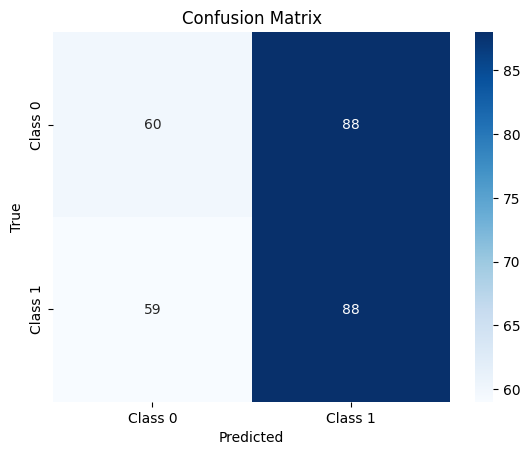

In [102]:
# Visualizing the performance of final model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Define your model and parameters
final_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)

# Assume X_scaled is your scaled features and y is the target variable
# Split your data into training and testing sets (here using a simple train-test split for demonstration)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Fit the model
final_model.fit(X_train, y_train)

# Predict labels and probabilities
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


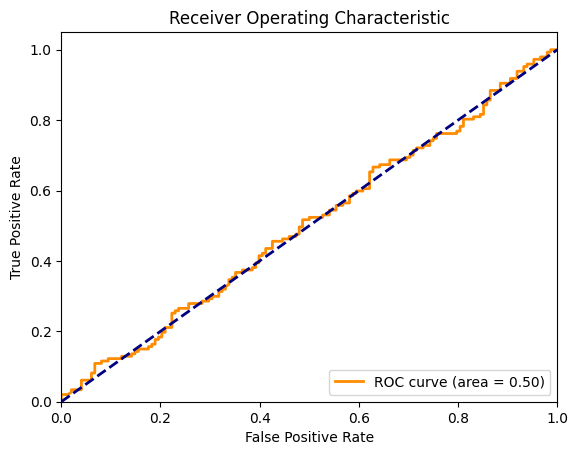

In [105]:
# ROC Curve
# ROC Curve shows the trade-off between true positive rate (sensitivity) and false positive rate

y_test_proba = final_model.predict_proba(X_test)[:, 1]  # Assuming a binary classification problem and using X_test instead of X_test_scaled
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

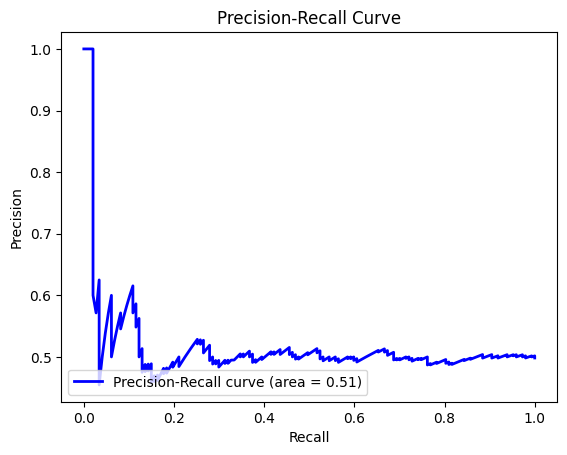

In [104]:
# Precision-Recall Curve
# Precision-Recall Curve helps us understand the trade-off between precision and recall for different thresholds

precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


# Next Steps (Skipped)
- **Deployment**: Consider deploying it for real-time predictions and monitoring.

- **Model Monitoring**: Set up a system to monitor the model's performance in production and retrain as necessary.

- **Continuous Improvement**: Regularly update your model and feature set based on new data and evolving market conditions.

# Anomaly Detection in Trading Volume
**Objective**: Identify unusual trading volumes that may indicate significant events.

**Model Recommendations**

- Isolation Forest: Effective for anomaly detection in high-dimensional spaces.
- Local Outlier Factor (LOF): Detects outliers by considering the local density deviation of a given data point.

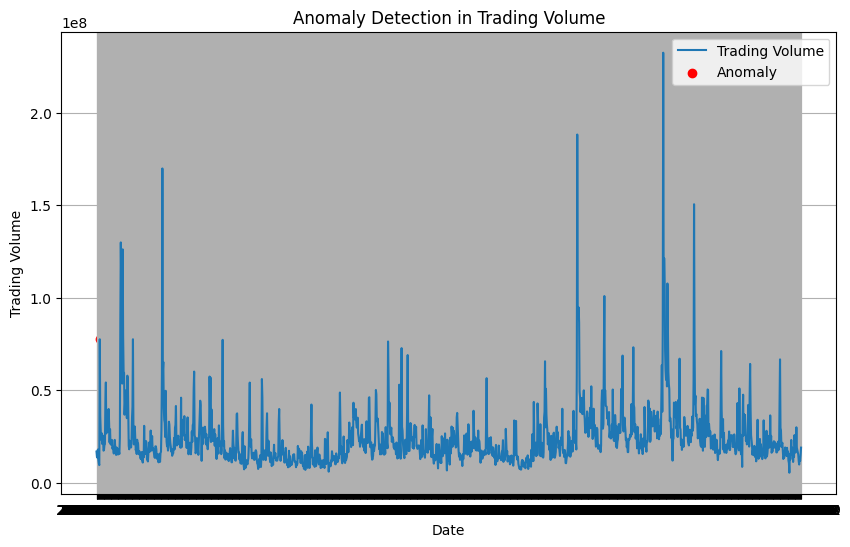

In [106]:
# Implementation

from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
clf = IsolationForest(contamination=0.05)  # Assuming 5% outliers
df['anomaly'] = clf.fit_predict(df[['Trading Volume']])

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Trading Volume'], label='Trading Volume')
anomalies = df[df['anomaly'] == -1]
plt.scatter(anomalies['Date'], anomalies['Trading Volume'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Anomaly Detection in Trading Volume')
plt.legend()
plt.grid(True)
plt.show()


- The trading volume varies significantly, with several peaks indicating higher trading activity.

- There are red markers labelled as "Anomaly" on the graph. These markers are at points where there are significant spikes in trading volume, suggesting these points are anomalies or unusual trading activities.